<h1> Regresióon logística </h1>

### Cliente churn con Regresión Logística
Una compañía de telecomunicaciones está preocupada por el número de clientes que dejan sus líneas fijas de negocio por las de competidores de cable. Ellos necesitan entender quién se está yendo. Imagina que eres un analista en esta compañía y que tienes que descubrir quién es el cliente que se va y por qué

Los datos incluyen información acerca de:

- Clientes que se fueron el último mes – la columna se llama Churn
- Los servicios que cada cliente ha contratado – teléfono, líneas múltiples, internet, seguridad online, resguardo online, protección de dispositivos, soporte técnico y streaming de TV y películas
- Información de la cuenta del cliente - cuánto hace que es cliente, contrato, método de pago, facturación digital, cargos mensuales y cargos totales
- Información demográfica de los clientes – sexo, rango de edad y si tienen pareja y dependientes

<h2> Importar librerías</h2>

In [4]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [8]:
# Importar datos
churn_df = pd.read_csv("../data/clientes_que_cancelan_servicio.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


<h2> Selección y pre-procesamiento de datos </h2>

Seleccionar algunas características para el modelado. Cambiar el tipo de dato del objetivo (target) para que sea un número entero (integer), ya que es un requerimiento del algoritmo skitlearn:

In [10]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


Definir X y Y para nuestro set de datos:

In [12]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [13]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

Normalizar el set de datos

In [14]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

<h2> Entrenar/Probar el set de datos </h2>

Ahora, dividamos nuestro set de datos en dos sets, entrenamiento y prueba:


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [25]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [26]:
X_test

array([[ 0.53250132, -0.08931261,  0.42929083,  0.40488962,  0.91629947,
         0.19865678,  1.16316   ],
       [ 0.81044894, -0.62595491, -1.05102238, -0.11810256, -1.42318853,
        -0.4728591 , -0.85972695],
       [-0.25501694, -1.00927084, -1.05102238, -0.4303367 , -1.42318853,
        -0.24902047, -0.85972695],
       [ 0.76412434, -0.1659758 , -0.55758464,  0.34244279,  0.13647013,
         0.87017266, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-1.41313204,  0.44732969, -0.4588971 , -0.22738451, -1.42318853,
        -0.4728591 , -0.85972695],
       [-0.48663996, -0.93260766, -0.261522  , -0.15713183,  0.91629947,
        -1.03245566, -0.85972695],
       [ 0.34720291, -0.93260766, -0.75495974, -0.32886061, -1.42318853,
         0.31057609, -0.85972695],
       [-1.41313204, -0.7026181 , -0.55758464, -0.32886061,  0.91629947,
        -0.80861704,  1.16316   ],
       [ 1.04207196, -0.3959

<h2> Modelando (Regresión Logística con Scikit-learn)</h2>

Se construye un modelo utilizando LogisticRegression con el package Scikit-learn. Esta función implementa regresión logística y puede usar distintos optimizadores numéricos para encontrar parámetros, a saber, ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. 

La versión de Regresión Logística en, soporta regularización. Esto es, una técnica que soluciona problemas de sobreajuste en modelos de machine learning.
El parámetro __C__ indica __fuerza de regularización inversa__ la cual debe ser un número flotante positivo. Valores más pequeños indican regularización más fuerte. 
Now lets fit our model with train set:

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Ahora, podremos predecir usando nuestro set de prueba:

In [29]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

__predict_proba__  devuelve estimaciones para todas las clases. La primer columna es la probabilidad de la clase 1, P(Y=1|X), y la segunda columna es la probabilidad de la clase 0, P(Y=0|X):

In [31]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

<h1> Evaluación
</h1>

<h3>índice jaccard</h3>
Probemos con el índice jaccard para la evaluación de precisión. Podemos definir como jaccard al tamaño de la intersección dividida por el tamaño de la unión de dos set de etiquetas. Si todo el set de etiquetas de muestra predichas coinciden con el set real de etiquetas, entonces la precisión es 1.0; sino, sería 0.0.



In [37]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.75

<h3>Matriz de confusión</h3>

Otra forma de mirar la precisión del clasificador es ver la matriz de confusión.

En el caso de clasificador binario, como el ejemplo, podemos entender a estos números como la cantidad de positivos verdaderos, negativos verdaderos y negativos falsos. 


In [53]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función muestra y dibuja la matriz de confusión.
    La normalización se puede aplicar estableciendo el valor `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Matriz de confusión sin normalización
[[ 6  9]
 [ 1 24]]


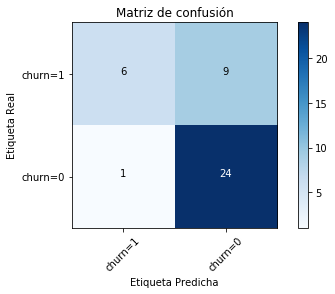

In [54]:
# Calcular la matriz de confusión
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Dibujar la matriz de confusión no normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Matriz de confusión')

In [55]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



Partiendo de la cantidad de cada sección podemos calcular la precisión y el grado(recall) de cada etiqueta:


- __Precision__ es una medida de certeza basada en una etiqueta predicha. Se define de esta forma: precision = TP / (TP + FP)

- __Recall__ es un grado positivo verdadero. Se define de esta forma: Recall =  TP / (TP + FN)

    
Por lo tanto, podemos calcular la precisión y grado de cada clase.

__F1 score:__
Ahora estamos en condiciones de calcular los puntajes F1 para cada etiqueta basada en la precisión y grado de cada etiqueta. 

El puntaje F1 es el promedio armónico de la precisión y grado, donde un grado F1 alcanza su mejor valor en 1 (precisión y grado perfectos) y peor escenario en 0. Es una buena forma de mostrar que un clasificador tiene un buen valor tanto para la precisión como para el grado.


Y finalmente, podemos decir que la exactitud promedio para este clasificador es el promedio del score f1 para ambas etiquetas, cuyo valor es is 0.72 en nuestro caso.

<h3>log loss</h3>
Ahora, probemos __log loss__ para la evaluación. En regresión logística, la salida puede ser que la probabilidad de cliente churn sea sí (o su equivalente 1). Esta probabilidad es un valor entre 0 y 1.
Log loss( pérdida logarítmica) mida el rendimiento de un clasificador donde la salida predicha es una probabilidad de valor entre 0 y 1. 


In [58]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101185

<h1>Practice</h1>